In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv


## Load the dataset.

In [10]:

df = pd.read_csv("/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv")
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


## Checking the data infos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

## Check the number of null values per column.

In [16]:
df.isnull().sum().sum()

10812

In [65]:
# There are 10,812 null values, so we can treat the dataframe
df_clean = df.dropna()
df_clean.isnull().sum().sum()

# But, it's a thing to consider. The number will drop drastically. 
# So, for now, I'll keep the dirty data, in order to mantain the data abundance
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 1 to 2608
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        238 non-null    int64  
 1   finalWorth                                  238 non-null    int64  
 2   category                                    238 non-null    object 
 3   personName                                  238 non-null    object 
 4   age                                         238 non-null    float64
 5   country                                     238 non-null    object 
 6   city                                        238 non-null    object 
 7   source                                      238 non-null    object 
 8   industries                                  238 non-null    object 
 9   countryOfCitizenship                        238 non-null    object 
 10  organization      

## Check the category with more wealth.

In [27]:
df["category"].value_counts()

category
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Name: count, dtype: int64

## Data Visualization of category with more wealth.

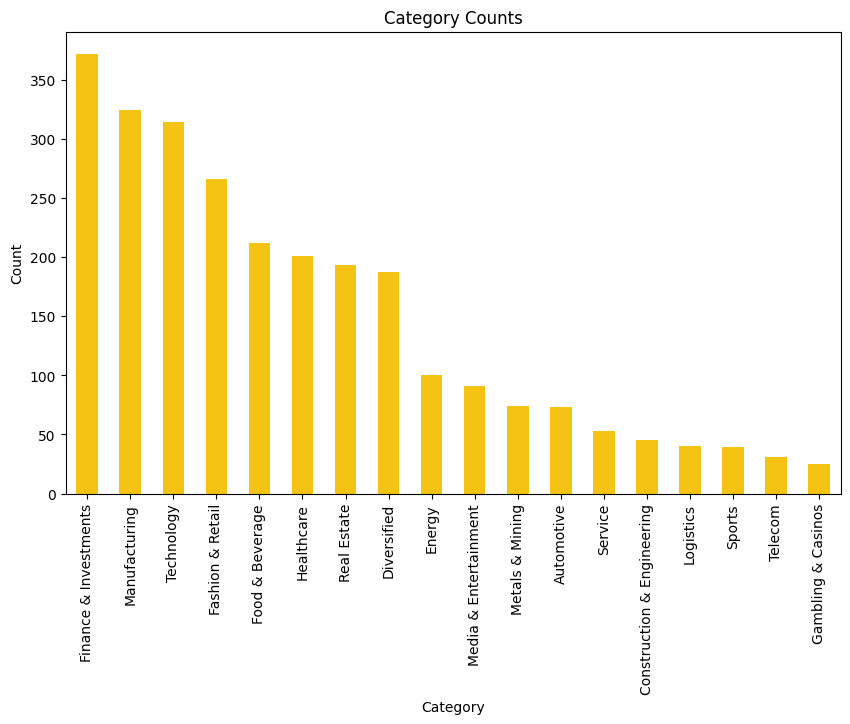

In [42]:

import matplotlib.pyplot as plt
category_counts = df["category"].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color = "#F4C314")
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Billionaires')
plt.xticks(rotation=90)
plt.show()

## Check the numbers of billionaires mens and womens.

In [58]:
gender_diversity = df['gender'].value_counts()
gender_diversity

gender
M    2303
F     337
Name: count, dtype: int64

## Data Visualization of billionaires mens and womens.

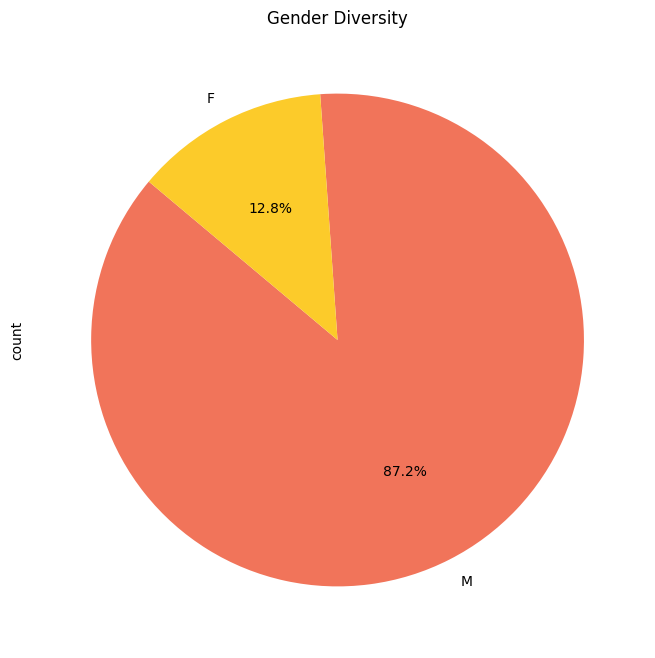

In [103]:

plt.figure(figsize=(8, 8))
gender_diversity.plot(kind="pie",labels=gender_diversity.index, autopct='%1.1f%%', startangle=140, colors=['#F1745A', '#FCCB2A'])
plt.title('Gender Diversity')
plt.show()

## Check the mean and median age.

In [135]:
# Now I1m gonna use the data cleaned 
age_mean = df_clean['age'].mean()
age_median = df_clean['age'].median()
df_clean['age'].describe()

count    238.000000
mean      66.344538
std       14.770501
min       28.000000
25%       56.250000
50%       67.000000
75%       78.000000
max       99.000000
Name: age, dtype: float64

## Data Visualization of mean and median age.

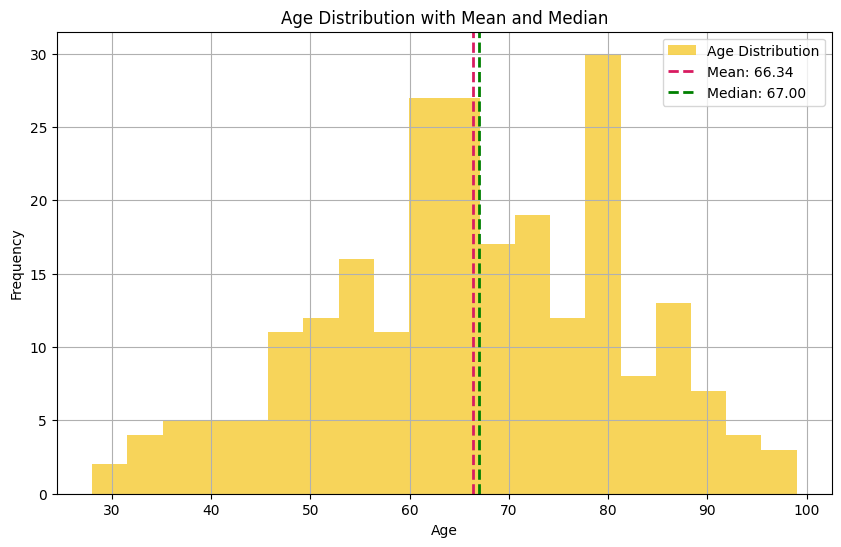

In [136]:
age_mean = df_clean['age'].mean()
age_median = df_clean['age'].median()


plt.figure(figsize=(10, 6))
plt.hist(df_clean['age'], bins=20, color='#f4c314', alpha=0.7, label='Age Distribution')
plt.axvline(x=age_mean, color='#d81b60', linestyle='dashed', linewidth=2, label=f'Mean: {age_mean:.2f}')
plt.axvline(x=age_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {age_median:.2f}')
plt.title('Age Distribution with Mean and Median')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## Check the Self-Made vs Inherited Wealh.

In [105]:
total_self_made = df['selfMade'].value_counts()
mapping = {True: 'Self-Made', False: 'Inherited'}
total_self_made = total_self_made.rename(mapping)
total_self_made

selfMade
Self-Made    1812
Inherited     828
Name: count, dtype: int64

## Data Visualization of Self-Made vs Inherited Wealh.

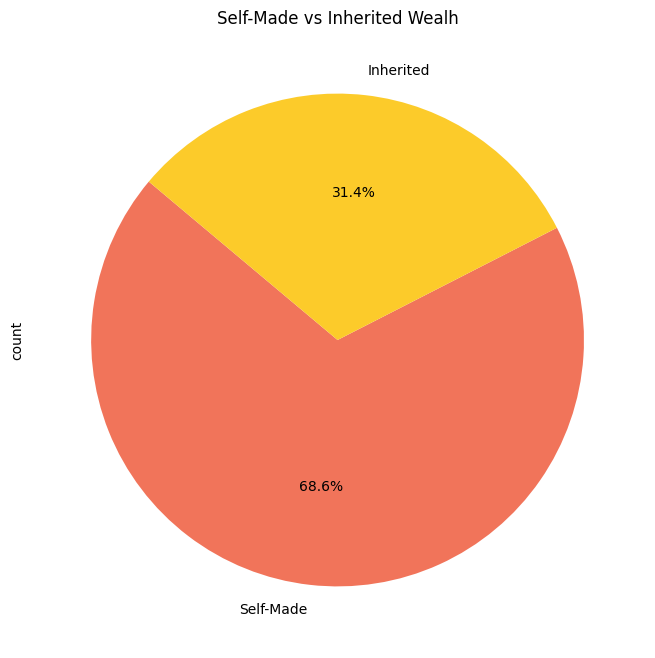

In [106]:
plt.figure(figsize=(8, 8))
total_self_made.plot(kind="pie",labels=total_self_made.index, autopct='%1.1f%%',startangle=140, colors=['#F1745A', '#FCCB2A'])
plt.title('Self-Made vs Inherited Wealh')
plt.show()

## Check Economic indicators.

In [123]:
df_filtered = df[['finalWorth', 'gdp_country', 'cpi_country', 'total_tax_rate_country']].copy()
df_filtered['gdp_country'] = pd.to_numeric(df_filtered['gdp_country'], errors='coerce')
df_filtered['cpi_country'] = pd.to_numeric(df_filtered['cpi_country'], errors='coerce')
df_filtered['total_tax_rate_country'] = pd.to_numeric(df_filtered['total_tax_rate_country'], errors='coerce')

# Printing the results
for column in columns:
    correlation = df_filtered['finalWorth'].corr(df_filtered[column])
    print(f"Correlation between finalWorth and {column}: {correlation:.2f}")

Correlation between finalWorth and gdp_country: nan
Correlation between finalWorth and cpi_country: -0.04
Correlation between finalWorth and total_tax_rate_country: -0.04


## Data Visualization of Economic indicators.

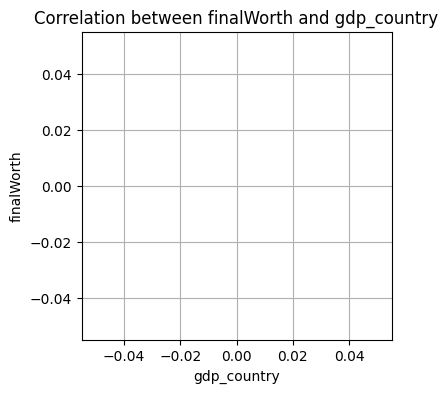

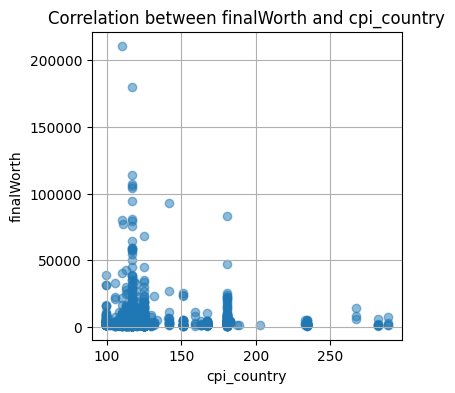

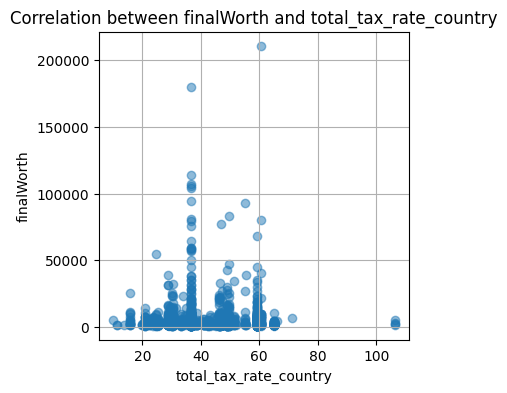

In [125]:
df_filtered = df[['finalWorth', 'gdp_country', 'cpi_country', 'total_tax_rate_country']].copy()
df_filtered['gdp_country'] = pd.to_numeric(df_filtered['gdp_country'], errors='coerce')
df_filtered['cpi_country'] = pd.to_numeric(df_filtered['cpi_country'], errors='coerce')
df_filtered['total_tax_rate_country'] = pd.to_numeric(df_filtered['total_tax_rate_country'], errors='coerce')


columns = ['gdp_country', 'cpi_country', 'total_tax_rate_country']

for column in columns:
    plt.figure(figsize=(4, 4))
    plt.scatter(df_filtered[column], df_filtered['finalWorth'], alpha=0.5)
    plt.title(f'Correlation between finalWorth and {column}')
    plt.xlabel(column)
    plt.ylabel('finalWorth')
    plt.grid(True)
    plt.show()


## Check the Countries with more billionaires.

In [130]:
df['country'].value_counts()

country
United States           754
China                   523
India                   157
Germany                 102
United Kingdom           82
                       ... 
Portugal                  1
Georgia                   1
Eswatini (Swaziland)      1
Uzbekistan                1
Armenia                   1
Name: count, Length: 78, dtype: int64

## Data Visualization of Countries with more billionaires.

In [134]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="country",  
    locationmode="country names",
    color="age", 
    hover_name="country",
    hover_data=["gender", "state"],
    title="Heatmap of Age Distribution by Country",
    color_continuous_scale="Viridis",  
    projection="natural earth",
)

fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
)

fig.show()
